In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 

In [3]:
dataframe = pd.DataFrame({
        'max_force':[],
        'max_lenght':[],
        'max_time':[],
        'section_area':pd.Series([], dtype=np.dtype('int32')),
        'is_valid': pd.Series([], dtype=np.dtype('bool_')),
    })

In [4]:
whitelist = ['3-2', '3-3', '3-5', '3-9', '3-10', '4-2', '5-6', '5-7', '5-10', '6-1', '6-3', '6-8', '6-9', '7-1', '7-3', '7-7', '7-8', '7-9']

In [5]:
for file in sorted(os.listdir('Data_samples/')):

    column_names = ['time', 'force', 'lenght']

    data = pd.read_csv(f'Data_samples/{file}', sep='\t', skiprows=17, decimal=',', names = column_names)

    name = file.split('.')[0]
    section_area = int(file[0]) * 10 
    max_force = data.force.max()
    max_lenght = data.loc[data.index[data.force.idxmax()], 'lenght']
    max_time = data.loc[data.index[data.force.idxmax()], 'time']

    if name in whitelist: 
        is_valid = True
    else:
        is_valid = False

    new_value = {
        'max_force': max_force,
        'max_lenght':max_lenght,
        'max_time':max_time,
        'section_area':section_area,
        'is_valid':is_valid
    }

    dataframe.loc[f'{name}'] = new_value

dataframe.to_csv('experiment_data.csv')

In [6]:
dataframe.tail()

,max_force,max_lenght,max_time,section_area,is_valid
7-5,1792.026,2.732233,163.93,70,False
7-6,1877.844,2.973667,178.42,70,False
7-7,1821.631,2.978700,178.72,70,True
7-8,1783.597,2.732367,163.94,70,True
7-9,1818.671,2.963700,177.82,70,True


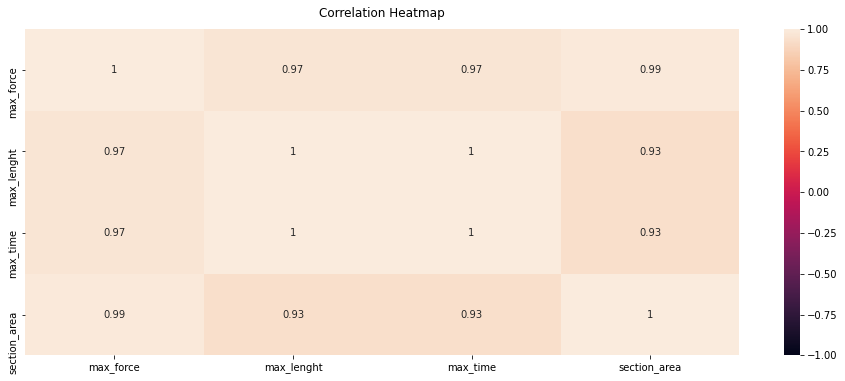

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(
    dataframe.drop('is_valid', axis=1).corr(), 
    vmin=-1,
    vmax=1,
    annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

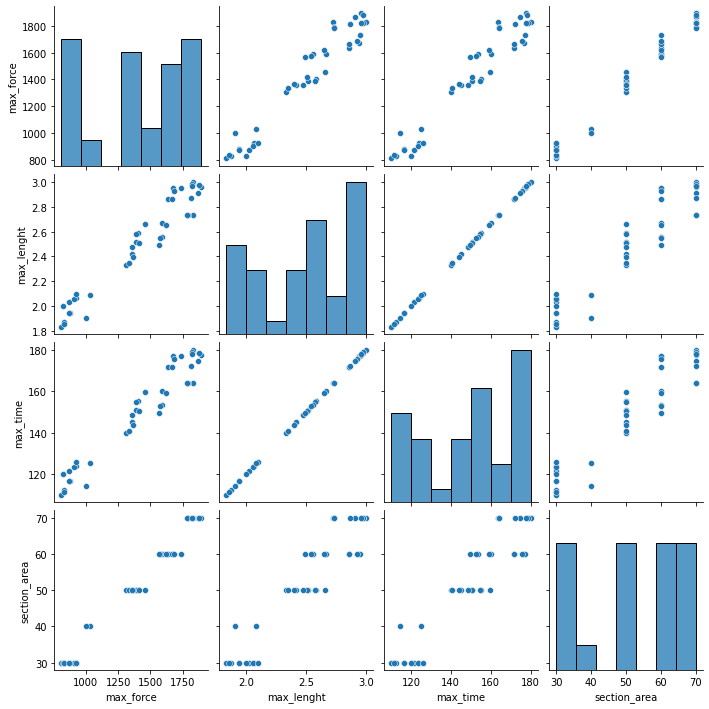

In [8]:
sns.pairplot(dataframe.drop('is_valid', axis=1))